In [1]:
pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 2.6 MB/s 
     |████████████████████████████████| 88 kB 2.1 MB/s 
     |████████████████████████████████| 5.2 MB 38.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 662 kB 53.2 MB/s 
     |████████████████████████████████| 85 kB 4.9 MB/s 
     |████████████████████████████████| 5.8 MB 36.2 MB/s 
     |████████████████████████████████| 1.3 MB 45.2 MB/s 
     |████████████████████████████████| 182 kB 43.1 MB/s 
     |████████████████████████████████| 7.6 MB 40.3 MB/s 
     |████████████████████████████████| 1.1 MB 39.2 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=2700819 sha256=8b68d3c0552b65c7e113bdd5f40063dce16d6ff8c5ff75fbfda71763d7d51c46
  Stored in directory: /root/.cache/

In [2]:
from bertopic import BERTopic
import pandas as pd
import numpy as np
from pandas import read_excel
import re
from datetime import datetime

In [3]:
from google.colab import drive
#drive.mount('/content/drive/drive/Shareddrives/ISE_540_Project/data')
drive.mount('/content/drive')
## Change directory
import os
os.chdir("drive/Shareddrives/ISE_540_Project/data")

Mounted at /content/drive


In [4]:
## Copy from here 

# Read the file
import json
from tqdm.autonotebook import tqdm
# Change the directory
f = open("patent_information_35000.json")
# returns JSON object as a dictionary
patent_dict = json.load(f)
f.close()

# Define queries and documents 
queries = patent_dict[:800]
docs = patent_dict[800:]


## Extract information 
def extract_information_patent(docs):
    title, abstract, title_and_abs, body = [], [], [], []
    citation = {}
    patent_index2id = {}
    patent_id2index = {}
    #doc_index2id = {}
    # Obtain all titles, abstracts, citations 
    for index, patent in enumerate(tqdm(docs)):
        patent_num = patent['patent']
        citation[patent_num] = [num['patent_number'] for num in patent['patent_citations']]
        titl = patent['title']
        abs = patent['abstract_text']
        title.append(titl)
        abstract.append(abs)
        title_and_abs.append(titl+'[SEP]'+abs)
        body.append(patent['body_message'])
        
        # Create index to id for querys and documents
        patent_index2id[index] = patent_num
        patent_id2index[patent_num] = index
    return title, abstract, title_and_abs, body, citation, patent_index2id, patent_id2index

# Run the function
title_q, abstract_q, title_and_abs_q, body_q, _, _, _ = extract_information_patent(queries)
title, abstract, title_and_abs, body, citation, patent_index2id, patent_id2index = extract_information_patent(docs)


## Until here 

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/34200 [00:00<?, ?it/s]

In [5]:
title_q.extend(title)
abstract_q.extend(abstract)
title_and_abs_q.extend(title_and_abs)


In [6]:
# title_q = list(set(title_q))
abstract_q = list(set(abstract_q))
title_and_abs_q = list(set(title_and_abs_q))

In [7]:
title_q[0]

'Electric vehicle having cover for inlet for DC charging and lock mechanism to lock cover'

In [8]:
len(title_q)

35000

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

In [10]:
# vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")
# topic_model = BERTopic(vectorizer_model=vectorizer_model).fit(df1['abstract_text'])
ctfidf_model = ClassTfidfTransformer()
#topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
# topics, probs = topic_model.fit_transform(df1['abstract_text'])


Topics = 10

In [11]:
topic_model_10 = BERTopic(language="english", ctfidf_model=ctfidf_model,nr_topics=10).fit(title_q)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

2022-12-05 03:03:30,485 - BERTopic - Transformed documents to Embeddings
2022-12-05 03:05:00,685 - BERTopic - Reduced dimensionality
2022-12-05 03:05:07,438 - BERTopic - Clustered reduced embeddings
2022-12-05 03:05:46,392 - BERTopic - Reduced number of topics from 618 to 11


In [12]:
freq_10 = topic_model_10.get_topic_info()
freq_10

,Topic,Count,Name
0,-1,28526,-1_and_for_system_method
1,0,1212,0_hybrid_vehicle_drive_electric
2,1,723,1_charging_electric_station_vehicle
3,2,704,2_transfer_energy_wireless_inductive
4,3,629,3_power_supply_noncontact_device
5,4,594,4_wireless_antenna_communication_network
6,5,574,5_charging_wireless_terminal_method
7,6,546,6_gaming_3d_wagering_game
8,7,504,7_fr_und_eines_verfahren
9,8,503,8_bicycle_mounting_structure_vehicle


In [13]:
topic_model_10.visualize_topics()

Read patents' title that related to the topics

In [20]:
for i in range(10):
  rep_10 = topic_model_10.get_representative_docs(i)
  print('-------------- When t =10, topics is {}: ----------------------------'.format(i))
  print(rep_10[:5])

-------------- When t =10, topics is 0: ----------------------------
['Electric vehicle propulsion system and method utilizing solid-state rechargeable electrochemical cells', 'Low voltage electrical vehicle propulsion system using double layer capacitors', 'Electric vehicle propulsion system and method utilizing solid-state rechargeable electrochemical cells', 'Front End Motor-Generator System and Hybrid Electric Vehicle Operating Method', 'Front end motor-generator system and hybrid electric vehicle operating method']
-------------- When t =10, topics is 1: ----------------------------
['Female terminal and charging connector', 'Charging connector for electric vehicle', 'System for charging an electric vehicle (EV)', 'Method and system for charging electric vehicles', 'Method and system for co-operative charging of electric vehicles']
-------------- When t =10, topics is 2: ----------------------------
['System and method for inductively transferring ac power and self alignment betwe

Topics = 20

In [21]:
topic_model_20 = BERTopic(language="english",ctfidf_model=ctfidf_model,nr_topics=20).fit(title_q)

2022-12-05 03:21:13,877 - BERTopic - Transformed documents to Embeddings
2022-12-05 03:22:11,384 - BERTopic - Reduced dimensionality
2022-12-05 03:22:17,104 - BERTopic - Clustered reduced embeddings
2022-12-05 03:22:50,286 - BERTopic - Reduced number of topics from 639 to 21


In [22]:
for i in range(20):
  rep_20 = topic_model_20.get_representative_docs(i)
  print('-------------- When t =20, topics is {}: ----------------------------'.format(i))
  print(rep_20[:5])

-------------- When t =20, topics is 0: ----------------------------
['Wireless electric power sharing between vehicles', 'Providing power over ethernet within a vehicular communication network', 'Wireless vehicle energy sharing', 'Wireless charging system for an electric vehicle, and charging method for same', 'Self-Charging Electric Vehicles and Aircraft, and Wireless Energy Distribution System']
-------------- When t =20, topics is 1: ----------------------------
['Power management in electric vehicles', 'Power management in electric vehicles', 'Power management in electric vehicles', 'Hybrid-electric vehicle plug-out mode energy management', 'Plug-in hybrid electric vehicle']
-------------- When t =20, topics is 2: ----------------------------
['Method and system for charging of electric vehicles according to user defined prices and price off-sets', 'Method and system for charging of electric vehicles', 'Systems and methods for charging electric vehicles', 'Electric vehicle chargin

In [ ]:
topic_model_20.visualize_topics()

In [ ]:
def extract_date(docs):
    date=[]
    for index, patent in enumerate(tqdm(docs)):
        date.append(patent['pub_date'])
    return date

date_q= extract_date(queries)
date = extract_date(docs)

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/34200 [00:00<?, ?it/s]

In [ ]:
date_q.extend(date)

In [ ]:
topics_over_time = topic_model_20.topics_over_time(docs=title_q, 
                                                timestamps=date_q, 
                                                global_tuning=True, 
                                                evolution_tuning=True, 
                                                nr_bins=25)

In [ ]:
topic_model_20.visualize_topics_over_time(topics_over_time, top_n_topics=20)

In [ ]:
topic_model_20.get_topics(0)

TypeError: ignored

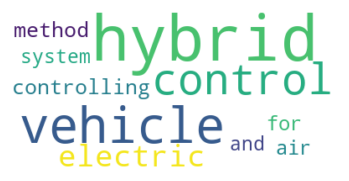

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model_20.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show word cloud
create_wordcloud(topic_model_20, topic=1)

Topic = 20 Visualization

In [ ]:
#Visualize Topic Hierarchy
topic_model_20.visualize_hierarchy(top_n_topics=50)

In [ ]:
#Visualize Terms
topic_model_20.visualize_barchart(top_n_topics=3)

In [ ]:
#Visualize Topic Similarity
topic_model_20.visualize_heatmap(n_clusters=19, width=1000, height=1000)

Topics = 30

In [ ]:
topic_model_30 = BERTopic(language="english",ctfidf_model=ctfidf_model,nr_topics=30).fit(title_q)

In [ ]:
freq_30 = topic_model_30.get_topic_info()
freq_30

,Topic,Count,Name
0,-1,18234,-1_and_for_method_system
1,0,1383,0_wireless_power_transfer_antenna
2,1,718,1_charging_electric_charge_station
3,2,710,2_hybrid_drive_vehicle_electric
4,3,579,3_video_media_content_recording
5,4,559,4_fr_und_eines_verfahren
6,5,488,5_gaming_3d_wagering_game
7,6,453,6_speech_recognition_synthesis_speaker
8,7,442,7_lithium_film_semiconductor_material
9,8,411,8_cooling_machine_permanent_magnet


In [ ]:
topic_model_30.visualize_topics()

In [ ]:
#find patent 

In [ ]:
for i in range(30):
  rep_30 = topic_model_30.get_representative_docs(i)
  print('-------------- When t =30, topics is {}: ----------------------------'.format(i))
  print(rep_30[:5])

Topics = 40

In [ ]:
topic_model_40 = BERTopic(language="english",ctfidf_model=ctfidf_model,nr_topics=40).fit(title_q)

In [ ]:
freq_40 = topic_model_40.get_topic_info()
freq_40

,Topic,Count,Name
0,-1,17041,-1_and_for_system_method
1,0,871,0_wireless_power_transfer_transmission
2,1,676,1_charging_electric_station_vehicle
3,2,524,2_fr_eines_und_verfahren
4,3,523,3_gaming_3d_wagering_game
5,4,461,4_speech_recognition_synthesis_speaker
6,5,454,5_communication_communications_routing_data
7,6,406,6_hybrid_powertrain_vehicle_drive
8,7,397,7_transmission_clutch_hydraulic_mower
9,8,389,8_cooling_machine_permanent_magnet


In [ ]:
topic_model_40.visualize_topics()

In [ ]:
#find patent title for t =40
for i in range(40):
  rep_40 = topic_model_40.get_representative_docs(i)
  print('-------------- When t =40, topics is {}: ----------------------------'.format(i))
  print(rep_40[:5])

In [ ]:
#the most frequent topics
#-1 refers to all outliers and should typically be ignored.

In [ ]:
# topic_model = BERTopic(nr_topics=10).fit(title_q)

In [ ]:
#topic_model = BERTopic(nr_topics=20).fit(title_q)

2022-11-17 01:12:28,586 - BERTopic - Transformed documents to Embeddings
2022-11-17 01:13:23,605 - BERTopic - Reduced dimensionality
2022-11-17 01:13:32,150 - BERTopic - Clustered reduced embeddings
2022-11-17 01:14:05,589 - BERTopic - Reduced number of topics from 620 to 21


In [ ]:
# freq = topic_model.get_topic_info()
# freq

,Topic,Count,Name
0,-1,20405,-1_and_for_system_method
1,0,1350,0_power_wireless_transmission_transfer
2,1,849,1_charging_electric_vehicle_station
3,2,826,2_hybrid_vehicle_control_drive
4,3,681,3_communication_wireless_communications_network
5,4,660,4_und_fr_eines_verfahren
6,5,605,5_battery_pack_module_monitoring
7,6,471,6_management_ecu_service_ic
8,7,426,7_speech_recognition_synthesis_speaker
9,8,425,8_power_supply_electric_vehicle


In [ ]:
# Select the most frequent topic
# topic_model.get_topic(0)

[('ue', 0.02277128338813095),
 ('wireless', 0.013887716871917626),
 ('uplink', 0.012513272116317272),
 ('radio', 0.011409235502022583),
 ('wtru', 0.010950499155441195),
 ('downlink', 0.010327969837746864)]

In [ ]:
# topic_model.topics_[:10]

[14, -1, 14, -1, 199, 199, 199, 199, 199, 199]

In [ ]:
#Visualize Topic Probabilities
# topic_model.visualize_distribution(probs[200], min_probability=0.01)

In [ ]:
#Visualize Term Score Decline
#The higher the score, the more representative a word to the topic is.
# topic_model_20.visualize_term_rank()

In [ ]:
#Update Topics
#remove stopwords or you want to try out a different n_gram_range
# topic_model.update_topics(df1['abstract_text'], n_gram_range=(1, 2))

In [ ]:
topic_model.get_topic(0) 

[('ue', 0.012387501802409764),
 ('wireless', 0.010658219510967622),
 ('network', 0.0076892595783024),
 ('radio', 0.007406997397730036),
 ('the ue', 0.00733941763018447),
 ('communication', 0.006544534065823903),
 ('may', 0.006460084416614241),
 ('uplink', 0.006399858492182323),
 ('transmission', 0.005897464634128078),
 ('channel', 0.005820469237133197)]

In [ ]:
#Topic Reduction
# topic_model.reduce_topics(df1['abstract_text'], nr_topics=10)

2022-11-16 11:55:03,056 - BERTopic - Reduced number of topics from 61 to 11


In [ ]:
# Access the newly updated topics with:
# print(topic_model.topics_)

[-1, -1, -1, -1, 5, 5, 5, 5, 5, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 5, -1, -1, -1, -1, -1, -1, -1, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, -1, 7, 7, -1, -1, -1, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, 7, -1, -1, -1, -1, -1, -1, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 5, -1, -1, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 2, -1, -1, -1, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 5, -1, -1, -1, 7, 7, 5, -1

# Search Topics

In [ ]:
similar_topics, similarity = topic_model.find_topics("electric", top_n=5); similar_topics

[8, 7, 3, 1, 5]

In [ ]:
similar_topics, similarity = topic_model.find_topics("vehicle", top_n=5); similar_topics

[5, 2, 7, -1, 3]

In [ ]:
similar_topics, similarity = topic_model.find_topics("battery", top_n=5); similar_topics

[7, 8, 6, 1, 5]

In [ ]:
#Model serialization
# Save model
topic_model.save("model_ev_title")
# Load model
#model_ev_titlel = BERTopic.load("model_ev_title")